# IRIS DATASET FOR MODEL BUILDING

In [48]:
import sys
print('Python: ',sys.version)
import scipy
print('scipy: ',scipy.__version__)
import numpy
print('numpy: ',numpy.__version__)
import matplotlib
print('matplotlib: ',matplotlib.__version__)
import pandas
print('pandas: ',pandas.__version__)
import sklearn
print('sklearn: ',sklearn.__version__)

Python:  3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy:  1.5.2
numpy:  1.19.2
matplotlib:  3.3.2
pandas:  1.1.3
sklearn:  0.23.2


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn import preprocessing, metrics

In [1]:
#load libraries

import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url, names=names)

In [24]:
dataset.shape

(150, 5)

In [26]:
dataset.head(30)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

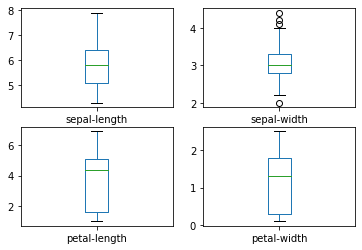

In [31]:
dataset.plot(kind='box', subplots=True, layout = (2,2),sharex=True,sharey=False)
plt.show()

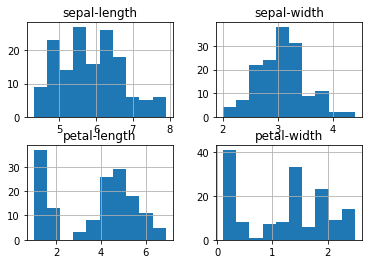

In [32]:
dataset.hist()
plt.show()

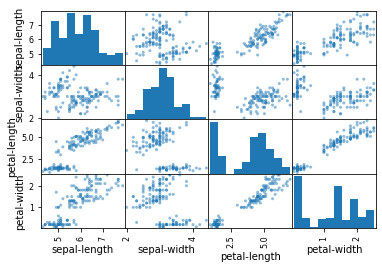

In [33]:
scatter_matrix(dataset)
plt.show()

In [40]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6
X_train , X_test , Y_train , Y_test = model_selection.train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [41]:
seed = 6
scoring = 'accuracy'

In [47]:
# spot check Algorithm
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

# Evaluate each model in turn 

results = []
names = []

for name , model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train, cv= kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950000 (0.076376)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.055277)
SVM: 0.950000 (0.076376)


In [53]:
import warnings
warnings.filterwarnings('ignore')

# LINEAR REGRESSION

In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

In [52]:
path = 'E:\Datasets\headbrain.csv'
data = pd.read_csv(path)
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [53]:
data.shape

(237, 4)

In [54]:
# collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [56]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values 
m = len(X)

# Using the formula to calculate b1 and b2

numer = 0
denomer = 0

for i in range (m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denomer += (X[i] - mean_x) **2 
    
b1 = numer/denomer
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1 , b0)

0.26342933948939945 325.57342104944223


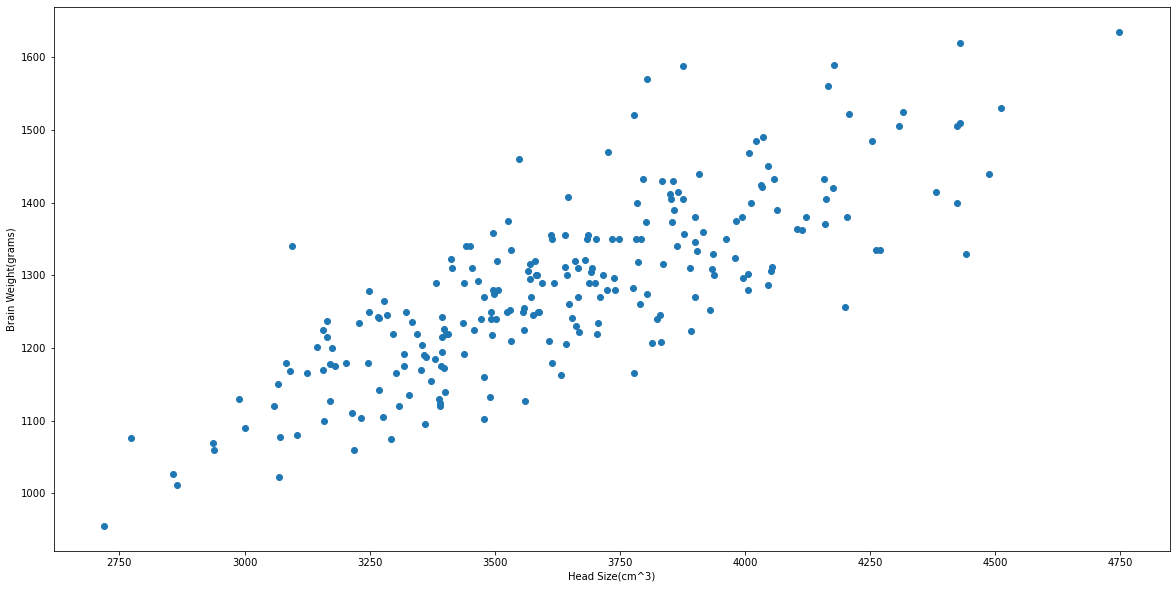

In [62]:
matplotlib.pyplot.scatter(X, Y)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()

In [73]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1* X[i]
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred) **2       #sum of residuals
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


# Linear Regression using Scikit learn Library

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use Rank 1 matrix in Scikit learn
X = X.reshape((m,1))
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X,Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating R2 score

r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957


# Titanic Data Analysis

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

titanic_data = pd.read_csv(r'E:\Datasets\titanic.csv')

In [94]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
print('number of passengers in original data : ' +str(len(titanic_data.index)) )

number of passengers in original data : 891


## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

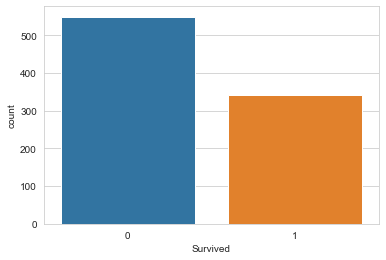

In [81]:
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

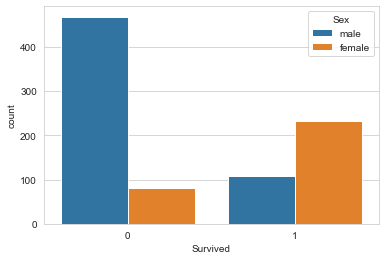

In [82]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

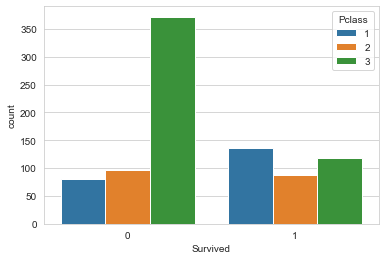

In [83]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

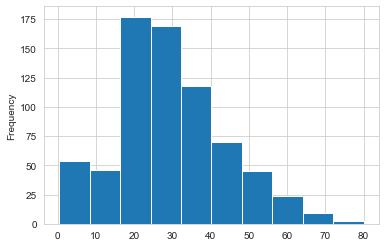

In [84]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

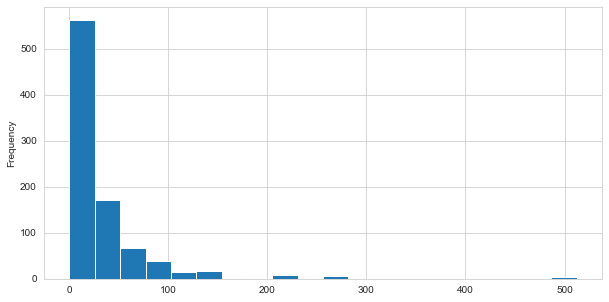

In [88]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [89]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

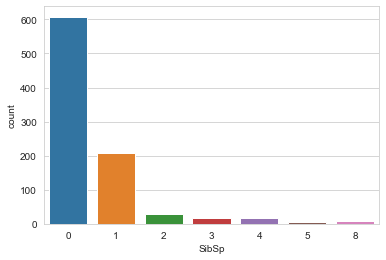

In [97]:
sns.countplot(x='SibSp',data=titanic_data)

In [96]:
titanic_data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Wrangling

In [98]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [99]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

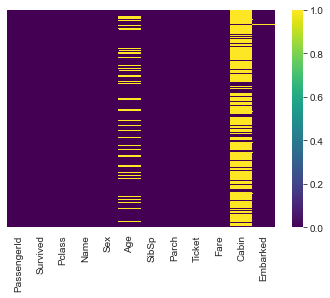

In [103]:
sns.heatmap(titanic_data.isnull(),yticklabels=False , cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

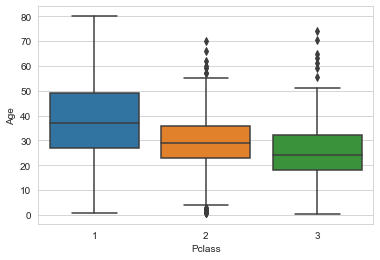

In [104]:
sns.boxplot(x='Pclass', y ='Age',data=titanic_data)

In [105]:
#Imputation : filling the values

In [106]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
titanic_data.drop('Cabin',axis=1,inplace = True)

In [109]:
titanic_data.dropna(inplace = True)

<AxesSubplot:>

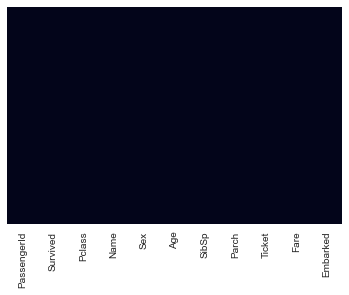

In [112]:
sns.heatmap(titanic_data.isnull(),yticklabels=False , cbar=False)

In [113]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [117]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [118]:
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [119]:
pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [120]:
titanic_data = pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [121]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [123]:
titanic_data.drop(['Sex','Embarked','Pclass','Name','Ticket'],axis=1,inplace = True)

In [124]:
titanic_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


# Train & Test Data using Logistic Regression

In [125]:
# Train Data

In [129]:
X = titanic_data.drop("Survived",axis=1)
y = titanic_data["Survived"]

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logmodel = LogisticRegression()

In [133]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [134]:
predictions = logmodel.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [137]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.80      0.80       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test,predictions)

array([[101,  25],
       [ 25,  63]], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy_score(y_test,predictions)

0.7663551401869159

# SUV DATA Analysis

In [144]:
suv_data = pd.read_csv(r'E:\\Datasets\suv_data.csv')

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [146]:
suv_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [147]:
X = suv_data.iloc[:,[2,3]].values
y = suv_data.iloc[:,4].values

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [155]:
y_pred = classifier.predict(X_test)

In [156]:
accuracy_score(y_test,y_pred)*100

89.0

# Decision Tree Algorithm

In [10]:
# For python 2/3 compatibility
#from_future_import print_fucntion

#sample dataset . 
#Format : each row is an example. 
# The last column is the label. 
# The first two columns are features. 
# If you want you can add more features & examples. 
# Interesting note : 2nd and 5th examples have the same features, but different labels -
#Let's see how tree handles this case. 

training_data = [
    ['Green',3,'Mango'],
    ['Yellow',3,'Mango'],
    ['Red',1,'Grape'],
    ['Red',1,'Grape'],
    ['Yellow',3,'Lemon']
]

#Column Labels
#These are used only to print the tree. 

header = ['color','diameter','label']

print("Question : Is diameter >=3 ?")

def unique_vals(rows,col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

# Demo :
# unique_values(trianing_data, 0)
#unique_values(training_data, 1)
######### 

def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}
    for row in rows:
        # in our dataset fformat , the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

########
#Demo:
# class_counts(training_data)
##########

def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value,int) or isinstance(value,float)

######
#Demo : 
# is_numeric(7)
# is_numeric("Red")
######

class Question:
    """A question is used to partition the dataset.
    This class just records a 'column number' (eg., 0 for color) and a 'column
    value' (e.g. Green). The 'match' method is used to compare the feature value in 
    an example to the feature value stored in the question. See the demo below."""
    
    def __init__(self,column,value):
        self.column = column
        self.value = value
        
    def match(self,example):
        #compare the feature value in an example to the feature value in the question
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
        
        def __repr__(self):
            # This is just a helper method to print
            #the question in a readable format
            condition = "=="
            if is_numeric(self.value):
                condition = ">="
            return "Is %s %s %s?" % (
                header[self.column], condition, str(self.value))
        
## Demo:

def partition(rows,question):
    """Partitions a dataset,
    
    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'."""
    
    true_rows, false_rows = [] ,[]
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

####
# Demo:
# Let's partition the training data based on whether rows are Red. 
# true_rows, false_rows = partition(trianing_data,Question(0,'Red'))
# This will contain all the 'Red' rows.
# train_rows
# This will contain everything else.
#false_rows
# This will contain everything else. 
#false_rows
######

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    
    There are a few different ways to do this, I thought this one
    was the most concise. """
    
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


######


def info_gain(left,right, current_uncertainty):
    """Information gain.
    
    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes."""
    
    p = float(len(left))/ (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1-p) * gini(right)

#######
# Demo:
# Ccalculate the uncertainty of our training data. 
#current_uncertainty = gini(trianing_data)

#
#How much information do we gain by partitioning on 'Green'?
# true_rows., false_rows = partition(training_data,Question(0,'Green'))
# info_gain(true_rows,false_rows,current_uncertainty)
#


def find_best_split(rows):
    """Find the best question to ask by iterating over every feature/value
    and calculating the information gain."""
    best_gain = 0 #keep track of the best information gain 
    best_question = None #keep train of the feature/value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1 # number of columns
    
    for col in range(n_features):  #for each feature
        
        values = set([row[col] for row in rows]) # unique values in the col
        
        for val in values:       #for each value
            
            question = Question(col,val)
            
            #try splitting the dataset
            true_rows, false_rows = partition(rows,question)
            
            #skip this split if it doesn't divide the dataset
            
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
                
            #calculate the infformation gain from this split
            gain = info_gain(true_rows,false_rows,current_uncertainty)
            
            #You actually can use '>' instdad of '>=' here
            #but I wanted the tree to look a certain way for our toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question
                
        return best_gain, best_question
    
    ###
    # Demo 
    #Find the best question to ask first for our toy dataset.
    # best_gain, best question = find_best_split(training_data)
    #FYI : is color == Red is just as good. See the note in the code above
    #where I used ">="
    ####
    
class leaf:
    """A leaf node classification data.
    
    This holds a dictionary of class (e.g. "Mango") -> number of times
    if appears in the rows from the training data that reach this leaf."""
    
    def __init__(self,rows):
        self.predictions = class_counts(rows)
        
class Decision_Node:
    """A decision node asks a question.
    
    This holds a reference to the question, and to the two child nodes."""
    
    def __init__(self,
              question,
              true_branch,
              false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        
def build_tree(rows):
    """Buils the tree.
    """
    #Try partitioning the dataset on each of the unique attribute,
    #calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)
    
    #Base case: no further info gain
    #Since we can ask no further question,
    # we will retuRN a leaf. 
    if gain == 0:
        return leaf(rows)
    
    #If we reach here, we have found a useful feature / value to partition on. 
    true_rows, false_rows = partition(rows,question)
    
    #Recursively build the true branch.
    true_branch = build_tree(true_rows)
    
    #Recursively build the false branch.
    false_branch = build_tree(false_rows)
    
    #Return a Question node.
    #This records the best feature / value to ask at this point,
    # as well as the brainches to follow
    # dependomg on the answer. 
    return Decision_Node(question,true_branch,false_branch)

def print_tree(node,spacing=""):
    """World's most elegant tree printing function."""
    
    #Base case: we'ave reached a leaf
    if isinstance(node,leaf):
        print(spacing +"Predict",node.predictions)
        return
    
    #Print the question at this node
    print(spacing + str(node.question))
    
    #call this function recursively on the true branch
    print(spacing + str(node.question))
    
    #call this function recurlively on the truee branch
    print(spacing + '--> True:')
    print_tree(node.true_branch,spacing + "  ")
    
    #call this function recurlively on the False branch
    print(spacing + '--> False:')
    print_tree(node.false_branch,spacing + "  ")
    
    
def classify(row,node):
    
    #Base case: we've reached a leaf 
    if isinstance(node,leaf):
        return node.predictions
    
    #Decide whether to follow the true-branch or the false-branch.
    #compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row,node.true_branch)
    else:
        return classify(row, node.false_branch)
    
    
##########

def print_leaf(counts):
    """Print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

######
# Deno:
#printing that a bit nicer
#print_leaf(classify(training_data[0], my_tree))
######

if __name__ == '__main__':
    
    my_tree = build_tree(training_data)
    
    print_tree(my_tree)
    
    #Evaluate 
    testing_data = [
        ['Green',3,'Mango'],
        ['Yellow',4,'Mango'],
        ['Red',2,'Grape'],
        ['Red',1,'Grape'],
        ['Yellow',3,'Lemon']
    ]
    
    for row in testing_data:
        print("Actual: %s. Prediced: %s" %
             (row[-1], print_leaf(classify(row, my_tree))))

#Next Steps

# - add support for missing(or unseen) attributed
# - prune the tree to prevEnt overfitting
# - add support for regression
    

Question : Is diameter >=3 ?
--> True:
  Predict {'Grape': 2}
--> False:
  --> True:
    Predict {'Mango': 1, 'Lemon': 1}
  --> False:
    Predict {'Mango': 1}
Actual: Mango. Prediced: {'Mango': '100%'}
Actual: Mango. Prediced: {'Mango': '50%', 'Lemon': '50%'}
Actual: Grape. Prediced: {'Grape': '100%'}
Actual: Grape. Prediced: {'Grape': '100%'}
Actual: Lemon. Prediced: {'Mango': '50%', 'Lemon': '50%'}


# Deicision Tree Algorithm for IRIS DATASET using scikit learn

In [36]:
import pandas as pd

In [37]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
iris_data = pd.read_csv(url, names=names) 

In [39]:
array = iris_data.values
X = array[:,0:4]
y = array[:,4]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

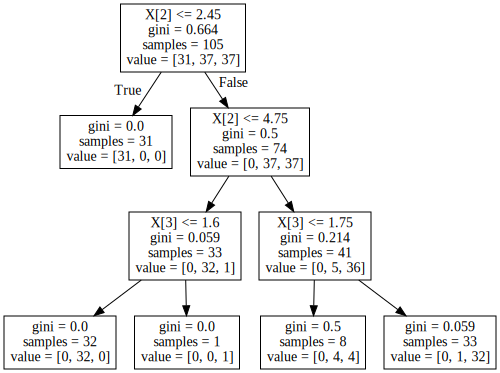

In [48]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Gini")
graph

**Check accuracy again**

In [50]:
seed = 6
scoring = 'accuracy'

In [54]:
# spot check Algorithm
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

# Evaluate each model in turn 

results = []
names = []

for name , model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model,X_train,y_train, cv= kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.953636 (0.084350)
LDA: 0.972727 (0.058210)
KNN: 0.943636 (0.061496)
CART: 0.942727 (0.062065)
NB: 0.924545 (0.079985)
SVM: 0.952727 (0.062430)
